# Indicateur

In [545]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import utm
import random as rd
import time
import json
import datetime
import matplotlib.dates as mdates

In [546]:
input_veh = os.getcwd() + "/OUTPUTS_7h_9h/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,85,Car,PersonalVehicle,NaN,NaN,13.800,SERVING,0.000,1107655.0
1,07:00:00.00,84,Car,PersonalVehicle,m1333372782 m46313483,NaN,13.800,SERVING,0.000,1111544.0
2,07:00:00.00,83,Car,PersonalVehicle,NaN,NaN,13.800,SERVING,0.000,1094501.0
3,07:00:00.00,82,Car,PersonalVehicle,m2092517853 m940694234,NaN,13.800,SERVING,0.000,1059898.0
4,07:00:00.00,81,Car,PersonalVehicle,m46313014 m46315889,NaN,13.800,SERVING,0.000,1104185.0
...,...,...,...,...,...,...,...,...,...,...
69967,09:21:00.00,9410,Car,PersonalVehicle,m940694234 m2092517853,628143.304 5805666.796,18.308,STOP,17815.412,NaN
69968,09:22:00.00,9362,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
69969,09:22:00.00,9368,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
69970,09:22:00.00,9393,Car,PersonalVehicle,m46474744 m1527925315,630991.604 5806265.889,18.316,SERVING,20685.123,1012391.0


In [547]:
def remove0Distance(df):
    ID = df['ID'].tolist()
    indices = [i for i, x in enumerate(ID) if ID.count(x) > 1]
    dataframe = df.loc[indices]
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [355]:
ID = veh['ID'].tolist()
indeices = [i for i, x in enumerate(ID) if ID.count(x) > 1]

In [356]:
veh2 = veh.loc[indeices]
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
1,07:00:00.00,84,Car,PersonalVehicle,m1333372782 m46313483,NaN,13.800,SERVING,0.000,1111544.0
3,07:00:00.00,82,Car,PersonalVehicle,m2092517853 m940694234,NaN,13.800,SERVING,0.000,1059898.0
4,07:00:00.00,81,Car,PersonalVehicle,m46313014 m46315889,NaN,13.800,SERVING,0.000,1104185.0
5,07:00:00.00,80,Car,PersonalVehicle,m1872281653 m46455254,NaN,13.800,SERVING,0.000,1008438.0
6,07:00:00.00,79,Car,PersonalVehicle,m5331758288 m702260853,NaN,13.800,SERVING,0.000,1054722.0
...,...,...,...,...,...,...,...,...,...,...
69967,09:21:00.00,9410,Car,PersonalVehicle,m940694234 m2092517853,628143.304 5805666.796,18.308,STOP,17815.412,NaN
69968,09:22:00.00,9362,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
69969,09:22:00.00,9368,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
69970,09:22:00.00,9393,Car,PersonalVehicle,m46474744 m1527925315,630991.604 5806265.889,18.316,SERVING,20685.123,1012391.0


In [183]:
veh2 = veh2.reset_index(drop=True)
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
69601,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69602,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69603,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69604,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [165]:
ID.count(8)

14

In [49]:
input_path = os.getcwd() + "/OUTPUTS_7h_9h_highway/path.csv"
path = pd.read_csv(input_path, delimiter = ";")
path

,ID,COST,PATH,LENGTH,SERVICE
0,1168071,1936.686911,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,16391.371423,PersonalVehicle
1,1040303,152.889987,ORIGIN_120 m5286520818 DESTINATION_120,217.103782,PersonalVehicle
2,1034483,1486.919521,ORIGIN_120 m46386982 m4477854926 m2311116268 m...,11469.634256,PersonalVehicle
3,985601,1524.120222,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,11983.003930,PersonalVehicle
4,396330,1524.120222,ORIGIN_122 m75538939 m46336665 m76475469 m4633...,11983.003930,PersonalVehicle
...,...,...,...,...,...
9405,1050286,1331.415956,ORIGIN_120 m46386982 m4477854926 m2311116268 m...,11469.634256,PersonalVehicle
9406,1106874,1094.358721,ORIGIN_121 m455971586 m46377432 m46375405 m463...,6959.951714,PersonalVehicle
9407,1120808,1599.368899,ORIGIN_122 m75538939 m46336665 m3175440817 m75...,9275.689425,PersonalVehicle
9408,1089329,23.837952,ORIGIN_106 m46186201 DESTINATION_106,33.849892,UBER


# By steps

In [52]:
"""
input_veh = os.getcwd() + "/OUTPUTS_test_every_10mn/veh.csv"
veh = pd.read_csv(input_veh, delimiter = ";")
veh
"""

'\ninput_veh = os.getcwd() + "/OUTPUTS_test_every_10mn/veh.csv"\nveh = pd.read_csv(input_veh, delimiter = ";")\nveh\n'

In [548]:
def track_a_vehicle(df, id):
    ID = df['ID'].tolist()
    indices = [i for i, x in enumerate(ID) if x == id]
    dataframe = df.loc[indices]
    return dataframe

In [549]:
# return a dataframe containing only uber
def only_uber(df):
    service = df.SERVICE.tolist()
    indices = [i for i,x in enumerate(service) if x == 'UBER']
    dataframe = df.loc[indices]
    return dataframe

In [215]:
input_user = os.getcwd() + "/OUTPUTS_7h_9h_highway/user.csv"
user = pd.read_csv(input_user, delimiter = ";")

In [310]:
input_ = os.getcwd() + "/OUTPUTS/user.csv"
user_ = pd.read_csv(input_, delimiter = ";")

In [468]:
user

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
0,07:00:00.00,1168071,ORIGIN_122 m75538939,635995.585 5803966.272,0.000,WALKING,NaN,NaN
1,07:00:00.00,1040303,ORIGIN_120 m5286520818,627662.073 5803966.272,0.000,WALKING,NaN,NaN
2,07:00:00.00,1034483,ORIGIN_120 m46386982,627662.073 5803966.272,0.000,WALKING,NaN,NaN
3,07:00:00.00,985601,ORIGIN_122 m75538939,635995.585 5803966.272,0.000,WALKING,NaN,NaN
4,07:00:00.00,396330,ORIGIN_122 m75538939,635995.585 5803966.272,0.000,WALKING,NaN,NaN
...,...,...,...,...,...,...,...,...
93738,09:38:00.00,872811,m4628394756 m4501193249,628845.804 5802538.031,9752.152,INSIDE_VEHICLE,0.0,NaN
93739,09:39:00.00,872811,m46347928 m351140210,627973.841 5803123.523,10851.429,INSIDE_VEHICLE,0.0,NaN
93740,09:40:00.00,872811,m46386982 DESTINATION_120,627585.527 5804038.090,11878.042,WALKING,NaN,NaN
93741,09:40:57.09,1090499,m75538939 DESTINATION_122,635995.585 5803966.272,13969.187,ARRIVED,NaN,NaN


In [311]:
user_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
0,07:00:00.00,1168071,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
1,07:00:00.00,1040303,ORIGIN_220 m1333372782,628100.679 5802248.604,0.000,WALKING,NaN,NaN
2,07:00:00.00,1034483,ORIGIN_239 m2092517853,628100.679 5805683.941,0.000,WALKING,NaN,NaN
3,07:00:00.00,985601,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
4,07:00:00.00,396330,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
...,...,...,...,...,...,...,...,...
90590,09:22:00.00,1012483,m1872281653 DESTINATION_240,631219.639 5805714.852,21919.792,WALKING,NaN,NaN
90591,09:22:40.63,1014038,m1872281653 DESTINATION_240,631170.920 5805683.941,21977.490,ARRIVED,NaN,NaN
90592,09:22:40.63,1012483,m1872281653 DESTINATION_240,631170.920 5805683.941,21977.490,ARRIVED,NaN,NaN
90593,09:23:00.00,1012391,m1872281653 DESTINATION_240,631219.639 5805714.852,21919.792,WALKING,NaN,NaN


In [350]:
utm.to_latlon(634241.161, 5802248.604, 31, 'U')

(52.3540687281289, 4.971114044626234)

In [351]:
utm.to_latlon(625030.438, 5802248.604, 31, 'U')

(52.35624670317322, 4.835947615525708)

In [283]:
df_latlon4

,lat,lon
0,52.327654,4.812234
1,52.331728,4.806866
2,52.336972,4.818795
3,52.341598,4.827878
4,52.345655,4.837002
5,52.349719,4.848764
6,52.347875,4.857383
7,52.345512,4.867440
8,52.340826,4.875833
9,52.332300,4.879455


In [315]:
ID = user_['ID'].tolist()
indices = [i for i, x in enumerate(ID) if x == 1111572]
dataframe_user1_ = user_.loc[indices]
dataframe_user1_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
85350,08:58:00.00,1111572,ORIGIN_222 m46320723,634241.161 5802248.604,0.000,WALKING,NaN,NaN
87351,09:01:29.46,1111572,ORIGIN_222 m46320723,634332.663 5802531.616,297.437,STOP,NaN,NaN
87746,09:02:00.00,1111572,m1904722588 m30119965,633868.446 5803090.101,1350.442,INSIDE_VEHICLE,9348.0,NaN
88194,09:03:00.00,1111572,m46371376 m46371931,633321.246 5803839.236,2407.722,INSIDE_VEHICLE,9348.0,NaN
88591,09:04:00.00,1111572,m46373679 m46359758,633358.783 5803694.712,3469.735,INSIDE_VEHICLE,9348.0,NaN
88956,09:05:00.00,1111572,m46361186 m46361181,632415.653 5803548.646,4536.170,INSIDE_VEHICLE,9348.0,NaN
89254,09:06:00.00,1111572,m46360614 m46360122,631351.867 5803498.885,5606.489,INSIDE_VEHICLE,9348.0,NaN
89526,09:07:00.00,1111572,m46348401 m3302706000,630455.701 5802999.699,6681.712,INSIDE_VEHICLE,9348.0,NaN
89740,09:08:00.00,1111572,m46329521 m295693437,629481.772 5802585.006,7761.523,INSIDE_VEHICLE,9348.0,NaN
89944,09:09:00.00,1111572,m304811916 m2739838009,628497.368 5802759.904,8846.282,INSIDE_VEHICLE,9348.0,NaN


# Trip for one person in a day(arcgis) - users : 1111572, 718069

In [214]:
def dataArcgis(df_user):
    Position = df_user.POSITION.tolist()
    tmp1 = [i.split() for i in Position]
    position_to_latlon =  [[utm.to_latlon(float(x[0]), float(x[1]), 31, 'U')[0], utm.to_latlon(float(x[0]), float(x[1]), 31, 'U')[1]] for x in tmp1]
    lat = [i[0] for i in position_to_latlon]
    lon = [i[1] for i in position_to_latlon]
    X_Start = lat.copy()
    Y_Start = lon.copy()
    X_End = lat.copy()
    Y_End = lon.copy()
    X_Start.pop(-1)
    Y_Start.pop(-1)
    X_End.pop(0)
    Y_End.pop(0)
    df_latlon = pd.DataFrame(list(zip(lat, lon)), columns = ['lat', 'lon'])
    df_toline = pd.DataFrame(list(zip(X_Start, Y_Start, X_End, Y_End)), columns = ['X_Start', 'Y_Start', 'X_End', 'Y_End'])
    return df_latlon, df_toline

In [318]:
df_latlon1_, df_toline1_ = dataArcgis(dataframe_user1_)

In [327]:
df_latlon3_, df_toline3_ = dataArcgis(dataframe_user3_)

In [337]:
#df_latlon1_.to_csv('df_latlon1_.csv', sep = ';', index = False)
#df_toline1_.to_csv('df_toline1_.csv', sep = ';', index = False)

In [566]:
dataframe_user4_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
49,07:00:00.00,1008438,ORIGIN_240 m1872281653,631170.920 5805683.941,0.000,WALKING,NaN,NaN
99,07:00:40.63,1008438,ORIGIN_240 m1872281653,631219.639 5805714.852,57.698,STOP,NaN,NaN
129,07:01:00.00,1008438,m46452278 m46453612,630343.726 5805683.097,1153.897,INSIDE_VEHICLE,80.0,NaN
286,07:02:00.00,1008438,m46478813 m46480824,629697.346 5806385.312,2246.571,INSIDE_VEHICLE,80.0,NaN
478,07:03:00.00,1008438,m46502543 m4620947756,629608.718 5807163.784,3335.507,INSIDE_VEHICLE,80.0,NaN
723,07:04:00.00,1008438,m46521938 m46526127,628777.048 5807823.916,4419.476,INSIDE_VEHICLE,80.0,NaN
1001,07:05:00.00,1008438,m4620948066 m46546563,628244.378 5808635.259,5500.073,INSIDE_VEHICLE,80.0,NaN
1506,07:06:00.00,1008438,m46556264 DESTINATION_258,628052.713 5809079.967,6125.577,WALKING,NaN,NaN
1645,07:06:43.67,1008438,m46556264 DESTINATION_258,628100.679 5809119.278,6187.594,ARRIVED,NaN,NaN
83916,08:56:00.00,1008438,ORIGIN_258 m46556264,628100.679 5809119.278,0.000,WALKING,NaN,NaN


# Dynamic

In [550]:
veh2 = remove0Distance(veh)
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,84,Car,PersonalVehicle,m1333372782 m46313483,NaN,13.800,SERVING,0.000,1111544.0
1,07:00:00.00,82,Car,PersonalVehicle,m2092517853 m940694234,NaN,13.800,SERVING,0.000,1059898.0
2,07:00:00.00,81,Car,PersonalVehicle,m46313014 m46315889,NaN,13.800,SERVING,0.000,1104185.0
3,07:00:00.00,80,Car,PersonalVehicle,m1872281653 m46455254,NaN,13.800,SERVING,0.000,1008438.0
4,07:00:00.00,79,Car,PersonalVehicle,m5331758288 m702260853,NaN,13.800,SERVING,0.000,1054722.0
...,...,...,...,...,...,...,...,...,...,...
67849,09:21:00.00,9410,Car,PersonalVehicle,m940694234 m2092517853,628143.304 5805666.796,18.308,STOP,17815.412,NaN
67850,09:22:00.00,9362,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
67851,09:22:00.00,9368,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
67852,09:22:00.00,9393,Car,PersonalVehicle,m46474744 m1527925315,630991.604 5806265.889,18.316,SERVING,20685.123,1012391.0


In [551]:
def computeDynamic(dir):
    # veh = only_uber(df)
    veh = pd.read_csv(dir + '/veh.csv', encoding='latin-1', delimiter=';')
    veh2 = remove0Distance(veh)
    table = veh2.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
    ax = table.plot.area()
    ax.tick_params(axis='x', labelrotation = 45)
    plt.savefig("dynamic_veh.pdf", bbox_inches='tight')

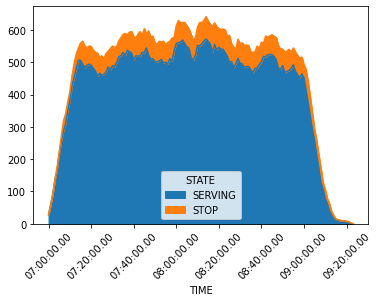

In [552]:
computeDynamic('OUTPUTS')

# Static

In [368]:
veh2

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,84,Car,PersonalVehicle,m1333372782 m46313483,NaN,13.800,SERVING,0.000,1111544.0
1,07:00:00.00,82,Car,PersonalVehicle,m2092517853 m940694234,NaN,13.800,SERVING,0.000,1059898.0
2,07:00:00.00,81,Car,PersonalVehicle,m46313014 m46315889,NaN,13.800,SERVING,0.000,1104185.0
3,07:00:00.00,80,Car,PersonalVehicle,m1872281653 m46455254,NaN,13.800,SERVING,0.000,1008438.0
4,07:00:00.00,79,Car,PersonalVehicle,m5331758288 m702260853,NaN,13.800,SERVING,0.000,1054722.0
...,...,...,...,...,...,...,...,...,...,...
67849,09:21:00.00,9410,Car,PersonalVehicle,m940694234 m2092517853,628143.304 5805666.796,18.308,STOP,17815.412,NaN
67850,09:22:00.00,9362,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
67851,09:22:00.00,9368,Car,PersonalVehicle,m1872281656 m1872281653,631219.639 5805714.852,18.316,STOP,21470.258,NaN
67852,09:22:00.00,9393,Car,PersonalVehicle,m46474744 m1527925315,630991.604 5806265.889,18.316,SERVING,20685.123,1012391.0


## Suppose a uber with two trips

In [200]:
veh_test = veh2.replace(to_replace=18, value=800)
veh_test

,TIME,ID,TYPE,SERVICE,LINK,POSITION,SPEED,STATE,DISTANCE,PASSENGERS
0,07:00:00.00,8,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1087621.0
1,07:00:00.00,7,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1090408.0
2,07:00:00.00,6,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1080968.0
3,07:00:00.00,5,Car,PersonalVehicle,m46186201 m46184457,NaN,13.800,SERVING,0.000,1088592.0
4,07:01:00.00,5,Car,PersonalVehicle,m4628394748 m3283395835,628533.146 5799236.347,18.316,SERVING,1098.935,1088592.0
...,...,...,...,...,...,...,...,...,...,...
69601,09:23:00.00,8883,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69602,09:23:00.00,8886,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69603,09:23:00.00,8893,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN
69604,09:23:00.00,8909,Car,PersonalVehicle,m46398228 m1582427317,623738.553 5804033.514,18.308,STOP,15205.946,NaN


In [557]:
user_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
0,07:00:00.00,1168071,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
1,07:00:00.00,1040303,ORIGIN_220 m1333372782,628100.679 5802248.604,0.000,WALKING,NaN,NaN
2,07:00:00.00,1034483,ORIGIN_239 m2092517853,628100.679 5805683.941,0.000,WALKING,NaN,NaN
3,07:00:00.00,985601,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
4,07:00:00.00,396330,ORIGIN_222 m46314640,634241.161 5802248.604,0.000,WALKING,NaN,NaN
...,...,...,...,...,...,...,...,...
90590,09:22:00.00,1012483,m1872281653 DESTINATION_240,631219.639 5805714.852,21919.792,WALKING,NaN,NaN
90591,09:22:40.63,1014038,m1872281653 DESTINATION_240,631170.920 5805683.941,21977.490,ARRIVED,NaN,NaN
90592,09:22:40.63,1012483,m1872281653 DESTINATION_240,631170.920 5805683.941,21977.490,ARRIVED,NaN,NaN
90593,09:23:00.00,1012391,m1872281653 DESTINATION_240,631219.639 5805714.852,21919.792,WALKING,NaN,NaN


In [675]:
ID = user_['ID'].tolist()
indices = [i for i, x in enumerate(ID) if x == 1049599]
dataframe_user1_ = user_.loc[indices]
dataframe_user1_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
13021,07:24:00.00,1049599,ORIGIN_219 m5331758288,625030.438 5802248.604,0.000,WALKING,NaN,NaN
13173,07:24:04.32,1049599,ORIGIN_219 m5331758288,625033.927 5802253.645,6.131,STOP,NaN,NaN
13586,07:25:00.00,1049599,m46298555 m46298558,625565.180 5801734.035,1053.572,INSIDE_VEHICLE,1649.0,NaN
14231,07:26:00.00,1049599,m735062781 m328181228,626541.604 5801797.287,2101.667,INSIDE_VEHICLE,1649.0,NaN
14838,07:27:00.00,1049599,m46307544 m46310177,627431.856 5802083.592,3149.544,INSIDE_VEHICLE,1649.0,NaN
15691,07:28:00.00,1049599,m46314545 DESTINATION_220,628068.189 5802220.017,3948.500,WALKING,NaN,NaN
15863,07:28:30.48,1049599,m46314545 DESTINATION_220,628100.679 5802248.604,3991.776,ARRIVED,NaN,NaN
37882,07:57:00.00,1049599,ORIGIN_220 m1333372782,628100.679 5802248.604,0.000,WALKING,NaN,NaN
38054,07:57:19.11,1049599,ORIGIN_220 m1333372782,628077.730 5802234.132,27.131,STOP,NaN,NaN
38496,07:58:00.00,1049599,m46312775 m46309535,627306.632 5802090.037,1069.688,INSIDE_VEHICLE,4236.0,NaN


In [620]:
veh = dataframe_user1_.VEHICLE.tolist()
[x for x in veh if str(x) != "nan"]

[6015.0,
 6015.0,
 6015.0,
 6160.0,
 6015.0,
 6160.0,
 6015.0,
 6160.0,
 6015.0,
 6015.0,
 6015.0]

## User

In [627]:
def nbVehicles(index, df): 
    State = df.STATE.tolist()
    veh = df.VEHICLE.tolist()
    i_start = [index[0]]
    i_end = []
    step = []
    t = 0
    for t in range(len(index) - 1):
        if (State[index[t]] == 'ARRIVED') & (t != len(index) - 1): # if not the last stop
            i_start.append(index[t+1])
            i_end.append(index[t])
            t = t
    i_end.append(index[-1])
    v = [veh[i] for i in index]
    tmp = [x for x in v if str(x) != "nan"] 
    cpt = len(list(set(tmp)))
    return (cpt, i_start, i_end) 

In [628]:
index = [m for m,x in enumerate(ID) if (x == 1053030 )]
cpt, i_start, i_end = nbVehicles(index, user_)

In [629]:
print(cpt, i_start, i_end)

2 [54939, 60126] [59922, 60885]


In [588]:
def buildDataframe_global_user(time, dist, nbVeh):
    data = [['TIME', sum(time), mean(time), min(time), max(time), np.std(time)], 
            ['DISTANCE', sum(dist), mean(dist), min(dist), max(dist), np.std(dist)],
             ['VEHICLE', sum(nbVeh), mean(nbVeh), min(nbVeh), max(nbVeh), np.std(nbVeh)]]
    df = pd.DataFrame(data, columns=['PARAMETRE', 'Total', 'Mean', 'Min', 'Max', 'Sd'])
    return df      

In [589]:
def buildDataframeUser(ids, time, dist, nbVeh):
    d = {'ID': ids, 'TIME': time, 'DISTANCE': dist, 'VEHICLE': nbVeh}
    df = pd.DataFrame(data = d)
    return df

In [667]:
def computeStaticUser(dir):
    df = pd.read_csv(dir + '/user.csv', encoding='latin-1', delimiter=';')
    time = []
    dist = []
    nbVeh = []
    ids = list(set(df.ID.tolist()))
    ID = df.ID.tolist()
    State = df.STATE.tolist()
    Distance = df.DISTANCE.tolist()
    veh = df.VEHICLE.tolist()
    Time = [float(i[:2])*3600 + float(i[3:5])*60 for i in df.TIME.tolist()]  # turn to second
    for i in ids:
        index = [m for m,x in enumerate(ID) if (x == i)]
        nb, i_start, i_end = nbVehicles(index, df)
        if nb != 0:
            travel_time = sum([Time[i_end[j]] - Time[i_start[j]] for j in range(len(i_start))])
            time.append(travel_time)
            dist.append(sum([Distance[i_end[j]] for j in range(len(i_end))]))
            nbVeh.append(nb)
        else:  # no passengers, no travels
            time.append(0)
            dist.append(0)
            nbVeh.append(0)
    ids = [ids[i] for i, x in enumerate(dist) if x != 0]   # dist != 0
    time = [time[i] for i, x in enumerate(dist) if x != 0]
    nbVeh = [nbVeh[i] for i, x in enumerate(dist) if x != 0]
    dist = [x for x in dist if x!= 0]
    df1 = buildDataframeUser(ids, time, dist, nbVeh) 
    df2 = buildDataframe_global_user(time, dist, nbVeh)
    print(df1)
    df1.to_csv('static_user.csv', index=False, sep=';')
    df2.to_csv('global_user.csv', index=False, sep=';')

In [570]:
dataframe_user4_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
49,07:00:00.00,1008438,ORIGIN_240 m1872281653,631170.920 5805683.941,0.000,WALKING,NaN,NaN
99,07:00:40.63,1008438,ORIGIN_240 m1872281653,631219.639 5805714.852,57.698,STOP,NaN,NaN
129,07:01:00.00,1008438,m46452278 m46453612,630343.726 5805683.097,1153.897,INSIDE_VEHICLE,80.0,NaN
286,07:02:00.00,1008438,m46478813 m46480824,629697.346 5806385.312,2246.571,INSIDE_VEHICLE,80.0,NaN
478,07:03:00.00,1008438,m46502543 m4620947756,629608.718 5807163.784,3335.507,INSIDE_VEHICLE,80.0,NaN
723,07:04:00.00,1008438,m46521938 m46526127,628777.048 5807823.916,4419.476,INSIDE_VEHICLE,80.0,NaN
1001,07:05:00.00,1008438,m4620948066 m46546563,628244.378 5808635.259,5500.073,INSIDE_VEHICLE,80.0,NaN
1506,07:06:00.00,1008438,m46556264 DESTINATION_258,628052.713 5809079.967,6125.577,WALKING,NaN,NaN
1645,07:06:43.67,1008438,m46556264 DESTINATION_258,628100.679 5809119.278,6187.594,ARRIVED,NaN,NaN
83916,08:56:00.00,1008438,ORIGIN_258 m46556264,628100.679 5809119.278,0.000,WALKING,NaN,NaN


In [602]:
dataframe_user1_

,TIME,ID,LINK,POSITION,DISTANCE,STATE,VEHICLE,CONTINUOUS_JOURNEY
54939,08:18:00.00,1053030,ORIGIN_220 m1333372782,628100.679 5802248.604,0.000,WALKING,NaN,NaN
55141,08:18:19.11,1053030,ORIGIN_220 m1333372782,628077.730 5802234.132,27.131,STOP,NaN,NaN
55630,08:19:00.00,1053030,m46318613 m46318165,628836.452 5802330.599,1064.934,INSIDE_VEHICLE,6015.0,NaN
56368,08:20:00.00,1053030,m84486707 m46331616,629749.901 5802676.133,2104.570,INSIDE_VEHICLE,6015.0,NaN
56504,08:20:00.00,1053030,ORIGIN_219 m5331758288,625030.438 5802248.604,0.000,WALKING,NaN,NaN
56721,08:20:04.32,1053030,ORIGIN_219 m5331758288,625033.927 5802253.645,6.131,STOP,NaN,NaN
57129,08:21:00.00,1053030,m46341776 m46347129,630669.441 5803087.606,3143.343,INSIDE_VEHICLE,6015.0,NaN
57242,08:21:00.00,1053030,m46298555 m46298558,625556.523 5801733.599,1044.904,INSIDE_VEHICLE,6160.0,NaN
57879,08:22:00.00,1053030,m734698878 m46360570,631515.137 5803502.909,4182.656,INSIDE_VEHICLE,6015.0,NaN
57985,08:22:00.00,1053030,m735062781 m328181228,626525.758 5801789.979,2084.217,INSIDE_VEHICLE,6160.0,NaN


In [601]:
print(i_start, i_end)

[54939, 60126] [59922]


In [668]:
computeStaticUser('OUTPUTS')

           ID    TIME   DISTANCE  VEHICLE
0     1015810  1020.0  13103.715        1
1     1015811   780.0  10130.636        1
2     1081352   480.0   8024.099        2
3      393233   960.0  11381.347        1
4     1114130   780.0  10130.636        1
...       ...     ...        ...      ...
6548  1015753  1020.0  13103.715        1
6549   982993   600.0   4811.318        1
6550  1081318  1920.0   6352.000        2
6551  1146859   600.0   4811.318        1
6552  1114100   600.0   4811.318        1

[6553 rows x 4 columns]


In [673]:
df1 = pd.read_csv('static_user.csv', encoding='latin-1', delimiter=';')
df1

,ID,TIME,DISTANCE,VEHICLE
0,1015810,1020.0,13103.715,1
1,1015811,780.0,10130.636,1
2,1081352,480.0,8024.099,2
3,393233,960.0,11381.347,1
4,1114130,780.0,10130.636,1
...,...,...,...,...
6548,1015753,1020.0,13103.715,1
6549,982993,600.0,4811.318,1
6550,1081318,1920.0,6352.000,2
6551,1146859,600.0,4811.318,1


In [674]:
df2 = pd.read_csv('global_user.csv', encoding='latin-1', delimiter=';')
df2

,PARAMETRE,Total,Mean,Min,Max,Sd
0,TIME,5.038980e+06,768.957729,240.000,3840.000,352.327870
1,DISTANCE,6.106919e+07,9319.272730,82.418,52175.152,4688.847701
2,VEHICLE,7.244000e+03,1.105448,1.000,4.000,0.328729


## vehicle

In [369]:
def nbTravels(index, df):
    State = df.STATE.tolist()
    i_start = [index[0]]
    i_end = []
    step = []
    cpt = 0
    t = 0
    for t in range(len(index) - 1):
        if (State[index[t]] == 'STOP') & (t != len(index) - 1): # if not the last stop
            i_start.append(index[t+1])
            i_end.append(index[t])
            cpt+=1
            t = t
    if (State[index[-1]] == 'STOP'): # if the last stop 
        i_end.append(index[-1])
        cpt+=1
        
    return (cpt, i_start, i_end) 

In [416]:
def computeStatic(dir):
    # df = only_uber(df)
    veh = pd.read_csv(dir + '/veh.csv', encoding='latin-1', delimiter=';')
    df = remove0Distance(veh)
    time = []
    dist = []
    nbPass = []
    ids = list(set(df.ID.tolist()))
    ID = df.ID.tolist()
    State = df.STATE.tolist()
    Distance = df.DISTANCE.tolist()
    Passenger = df.PASSENGERS.tolist()
    #cleanNan = lambda l : [x for x in l if str(x) != 'nan']  # clean nan 
    Time = [float(i[:2])*3600 + float(i[3:5])*60 for i in df.TIME.tolist()]  # turn to second
    for i in ids:
        index = [m for m,x in enumerate(ID) if (x == i)]
        nb, i_start, i_end = nbTravels(index, df)
        if nb != 0:
            travel_time = sum([Time[i_end[i]] - Time[i_start[i]] for i in range(len(i_start))])
            time.append(travel_time)
            dist.append(sum([Distance[i_end[i]] for i in range(len(i_end))]))
            nbPass.append(nb)
        else:  # no passengers, no travels
            time.append(0)
            dist.append(0)
            nbPass.append(0)
    df1 = buildDataframe(ids, time, dist, nbPass) 
    df2 = buildDataframe_global(time, dist, nbPass)
    df1.to_csv('static_veh.csv', index=False, sep=';')
    df2.to_csv('global_veh.csv', index=False, sep=';')
    return df1

In [371]:
def buildDataframe_global(time, dist, nbPass):
    data = [['TIME', sum(time), mean(time), min(time), max(time), np.std(time)], 
            ['DISTANCE', sum(dist), mean(dist), min(dist), max(dist), np.std(dist)],
             ['PASSENGERS', sum(nbPass), mean(nbPass), min(nbPass), max(nbPass), np.std(nbPass)]]
    df = pd.DataFrame(data, columns=['PARAMETRE', 'Total', 'Mean', 'Min', 'Max', 'Sd'])
    return df                                                                                                                                                                                                        

In [415]:
ids, time, dist, nbPass = computeStatic('OUTPUTS')

In [380]:
def buildDataframe(ids, time, dist, nbPass):
    d = {'ID': ids, 'TIME': time, 'DISTANCE': dist, 'PASSENGERS': nbPass}
    df = pd.DataFrame(data = d)
    return df

In [417]:
computeStatic('OUTPUTS')

,ID,TIME,DISTANCE,PASSENGERS
0,51,480.0,8014.583,1
1,52,780.0,13617.878,1
2,53,480.0,8014.583,1
3,55,180.0,3250.850,1
4,56,240.0,4201.618,1
...,...,...,...,...
7238,9405,480.0,7855.753,1
7239,9406,420.0,7007.609,1
7240,9407,420.0,6892.170,1
7241,9409,420.0,6892.170,1


In [381]:
df1 = buildDataframe(ids, time, dist, nbPass)
df1

,ID,TIME,DISTANCE,PASSENGERS
0,51,480.0,8014.583,1
1,52,780.0,13617.878,1
2,53,480.0,8014.583,1
3,55,180.0,3250.850,1
4,56,240.0,4201.618,1
...,...,...,...,...
7238,9405,480.0,7855.753,1
7239,9406,420.0,7007.609,1
7240,9407,420.0,6892.170,1
7241,9409,420.0,6892.170,1


In [382]:
df2 = buildDataframe_global(time, dist, nbPass)
df2s

,PARAMETRE,Total,Mean,Min,Max,Sd
0,TIME,3.636660e+06,502.093055,180.000,1500.000,208.734929
1,DISTANCE,5.970918e+07,8243.708111,3163.671,25823.114,3635.274281
2,PASSENGERS,7.243000e+03,1.000000,1.000,1.000,0.000000


In [467]:
len(set(user.ID))

8190

In [384]:
len(nbPass) == len(set(veh2.ID.tolist()))

True

In [539]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import utm
import random as rd
import time
import json
import datetime
import matplotlib.dates as mdates

# remove mobilities that have no travel distance
def remove0Distance(df):
    ID = df['ID'].tolist()
    indices = [i for i, x in enumerate(ID) if ID.count(x) > 1]
    dataframe = df.loc[indices]
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

# return a dataframe containing only on-demand mobility service
def only_on_demand(df, on_demand_mobility):
    
    service = df.SERVICE.tolist()
    [i for i,x in enumerate(service) if x == on_demand_mobility]
    dataframe = df.loc[indices]
    return dataframe

def computeDynamic(dir):
    
    veh = pd.read_csv(dir + '/veh.csv', encoding='latin-1', delimiter=';')
    veh2 = remove0Distance(veh)
    table = veh2.groupby(['TIME', 'STATE']).ID.count().unstack().fillna(0)
    ax = table.plot.area()
    ax.tick_params(axis='x', labelrotation = 45)
    plt.savefig(dir + '/graph/dynamic_veh.png', bbox_inches='tight')
    
    
def nbTravels(index, df):
    
    State = df.STATE.tolist()
    i_start = [index[0]]
    i_end = []
    step = []
    cpt = 0
    t = 0
    for t in range(len(index) - 1):
        if (State[index[t]] == 'STOP') & (t != len(index) - 1): # if not the last stop
            i_start.append(index[t+1])
            i_end.append(index[t])
            cpt+=1
            t = t
    if (State[index[-1]] == 'STOP'): # if the last stop 
        i_end.append(index[-1])
        cpt+=1
    return (cpt, i_start, i_end) 

def buildDataframe_global(time, dist, nbPass):
   
    data = [['TIME', sum(time), mean(time), min(time), max(time), np.std(time)], 
            ['DISTANCE', sum(dist), mean(dist), min(dist), max(dist), np.std(dist)],
             ['PASSENGERS', sum(nbPass), mean(nbPass), min(nbPass), max(nbPass), np.std(nbPass)]]
    df = pd.DataFrame(data, columns=['PARAMETRE', 'Total', 'Mean', 'Min', 'Max', 'Sd'])
    return df   

def buildDataframe(ids, time, dist, nbPass):
  
    d = {'ID': ids, 'TIME': time, 'DISTANCE': dist, 'PASSENGERS': nbPass}
    df = pd.DataFrame(data = d)
    return df


def computeStatic(dir):
    
    veh = pd.read_csv(dir + '/veh.csv', encoding='latin-1', delimiter=';')
    df = remove0Distance(veh)
    time = []
    dist = []
    nbPass = []
    ids = list(set(df.ID.tolist()))
    ID = df.ID.tolist()
    State = df.STATE.tolist()
    Distance = df.DISTANCE.tolist()
    Passenger = df.PASSENGERS.tolist()
    #cleanNan = lambda l : [x for x in l if str(x) != 'nan']  # clean nan 
    Time = [float(i[:2])*3600 + float(i[3:5])*60 for i in df.TIME.tolist()]  # turn to second
    for i in ids:
        index = [m for m,x in enumerate(ID) if (x == i)]
        nb, i_start, i_end = nbTravels(index, df)
        if nb != 0:
            travel_time = sum([Time[i_end[i]] - Time[i_start[i]] for i in range(len(i_start))])
            time.append(travel_time)
            dist.append(sum([Distance[i_end[i]] for i in range(len(i_end))]))
            nbPass.append(nb)
        else:  # no passengers, no travels
            time.append(0)
            dist.append(0)
            nbPass.append(0)
    df1 = buildDataframe(ids, time, dist, nbPass) 
    df2 = buildDataframe_global(time, dist, nbPass)
    df1.to_csv('static_veh.csv', index=False, sep=';')
    df2.to_csv('global_veh.csv', index=False, sep=';')
    # distance per passenger
    sum_distance = df2.iloc[1]['Total']
    sum_passenger = df2.iloc[2]['Total']
    distance_per_passenger = (sum_distance / sum_passenger)*1e-3  # km
    return distance_per_passenger


def speed_evolution(dir):
    
    flow = pd.read_csv(dir + '/flow.csv', encoding='latin-1', delimiter = ";")
    flow2 = flow[['TIME', 'SPEED']].groupby('TIME').mean().reset_index()
    speed = flow2.SPEED
    time = [i[:5] for i in flow2.TIME]
    times = [datetime.datetime.strptime(i, '%H:%M').time() for i in time]
    ax = plt.axes()
    # Convert datetime.time objects into datetime.datetime objects by adding a date
    # to the time
    datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in times]
    ax.plot(datetimes, speed)
    ax.set_title('Speed evolution')
    ax.set_ylabel('Speed')
    ax.set_xlabel('Time')
    # Re-format the x-axis
    fmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    plt.savefig(dir + f"/graph/speed_evolution_veh")
    plt.show()
    

In [436]:
computeStatic('OUTPUTS')

8.243708111417915

In [462]:
df1

,ID,TIME,DISTANCE,PASSENGERS
0,51,480.0,8014.583,1
1,52,780.0,13617.878,1
2,53,480.0,8014.583,1
3,55,180.0,3250.850,1
4,56,240.0,4201.618,1
...,...,...,...,...
7238,9405,480.0,7855.753,1
7239,9406,420.0,7007.609,1
7240,9407,420.0,6892.170,1
7241,9409,420.0,6892.170,1


In [463]:
df2

,PARAMETRE,Total,Mean,Min,Max,Sd
0,TIME,3.636660e+06,502.093055,180.000,1500.000,208.734929
1,DISTANCE,5.970918e+07,8243.708111,3163.671,25823.114,3635.274281
2,PASSENGERS,7.243000e+03,1.000000,1.000,1.000,0.000000


## Distance per passenger

In [385]:
sum_passenger = df2.iloc[2]['Total']
sum_distance = df2.iloc[1]['Total']
distance_per_passenger = (sum_distance / sum_passenger)*1e-3  # km
distance_per_passenger

8.243708111417915

In [386]:
sum_distance

59709177.85099996

In [452]:
u = pd.read_csv('OUTPUTS/user.csv', encoding='latin-1', delimiter=';')
l_waiting = []
u.groupby('ID')

In [553]:
def waiting_time(df_w, list_w):
    """

    @param df_w:
    @param list_w:
    @return:
    """
    w = 0
    waiting_answer = df_w[df_w.STATE == 'WAITING_ANSWER']
    if not waiting_answer.empty:
        h1 = waiting_answer[0]
        h2 = waiting_answer[-1]
        h1h2 = float(h2[0:2]) * 3600 + float(h2[3:5]) * 60 + float(h2[6:8]) - float(h1[0:2]) * 3600 + float(
            h1[3:5]) * 60 + float(h1[6:8])
        w += h1h2
    waiting_vehicle = df_w[df_w.STATE == 'WAITING_VEHICLE']
    if not waiting_vehicle.empty:
        h1 = waiting_vehicle[0]
        h2 = waiting_vehicle[-1]
        h1h2 = float(h2[0:2]) * 3600 + float(h2[3:5]) * 60 + float(h2[6:8]) - float(h1[0:2]) * 3600 + float(
            h1[3:5]) * 60 + float(h1[6:8])
        w += h1h2
    list_w.append(w)


def data_outputs_static(dir):
    """

    @param dir:
    @return:
    """
    p = pd.read_csv(dir + '/path.csv', encoding='latin-1', delimiter=';')
    u = pd.read_csv(dir + '/user.csv', encoding='latin-1', delimiter=';')
    l_waiting = []
    u.groupby('ID').apply(waiting_time, list_w=l_waiting)
    list_arrived = list(u[u.STATE == 'ARRIVED'].ID.unique())
    bool_arrived = pd.Series(u.ID.unique()).isin(list_arrived)
    data = {'ID': p.ID, 'Origin': [], 'Destination': [], 'Time': p.COST, 'Distance': p.LENGTH,
            'Waiting_Time': l_waiting, 'Arrived': bool_arrived}
    origin = []
    destination = []
    for i in p.index:
        origin.append(p.loc[i].PATH.split()[0])
        destination.append(p.loc[i].PATH.split()[-1])
    print(len(origin) == len(bool_arrived))
    data['Origin'] = origin
    data['Destination'] = destination
    output = pd.DataFrame(data=data)
    sum_time = {'Min': p.COST.min(), 'Max': p.COST.max(), 'Mean': p.COST.mean(), 'SD': np.std(p.COST),
                'Median': p.COST.median()}

    sum_dist = {'Min': p.LENGTH.min(), 'Max': p.LENGTH.max(), 'Mean': p.LENGTH.mean(), 'SD': np.std(p.LENGTH),
                'Median': p.LENGTH.median()}

    sum_arrived = {'Proportion': len(output[output.Arrived]) / len(output)}

    sum_waiting = {'Min': float(output.Waiting_Time.min()), 'Max': float(output.Waiting_Time.max()),
                   'Mean': float(output.Waiting_Time.mean()),
                   'SD': float(np.std(output.Waiting_Time)), 'Median': float(output.Waiting_Time.median())}

    res_dict = {'Time': sum_time, 'Distance': sum_dist, 'Arrived': sum_arrived, 'Waiting_Time': sum_waiting, 'User': {}}
    for i in output.index:
        res_dict['User'][i] = {'ID': str(output.loc[i].ID), 'Origin': output.loc[i].Origin,
                               'Destination': output.loc[i].Destination,
                               'Time': output.loc[i].Time, 'Distance': output.loc[i].Distance,
                               'Waiting_time': float(output.loc[i].Waiting_Time),
                               'Arrived': int(output.loc[i].Arrived)}
    output.to_csv('test_output_data.csv', index=False, sep=';')
    with open('data_and_sum.json', 'w') as fp:
        json.dump(res_dict, fp)




def graph_data(df, dir):
    """

    @param df:
    @param dir:
    @return:
    """
    df_arrived = df[df.Arrived]
    plt.hist(df_arrived.Time)
    plt.xlabel('Time (s)')
    plt.ylabel('User')
    plt.axvline(df_arrived.Time.mean(), color='red')
    plt.axvline(df_arrived.Time.median(), color='yellow')
    plt.savefig(dir + f"/graph/time")
    plt.close()

    plt.hist(df_arrived.Distance)
    plt.xlabel('Distance (m)')
    plt.ylabel('User')
    plt.axvline(df_arrived.Distance.mean(), color='red')
    plt.axvline(df_arrived.Distance.median(), color='yellow')
    plt.savefig(dir + f"/graph/distance")
    plt.close()


def data_transformation(df_user):
    """

    @param df_user:
    @return:
    """
    u = df_user
    u = u.groupby('ID').apply(walking_sim)
    u.reset_index(drop=True, inplace=True)
    u = u.sort_values('TIME')
    u.reset_index(drop=True, inplace=True)
    u = u.groupby('ID').apply(get_main_activity)
    u.reset_index(drop=True, inplace=True)
    u = u.sort_values('TIME')
    u.reset_index(drop=True, inplace=True)

    return u


def time_round(str_time):
    """

    @param str_time:
    @return:
    """
    return str_time[-5:] == '00.00'

def arrived_sim(df):
    u = df


def walking_sim(df):
    u = df
    u_tampon = pd.DataFrame(data={'TIME': [], 'ID': [], 'LINK': [],
                                  'POSITION': [],
                                  'DISTANCE': [], 'STATE': [],
                                  'VEHICLE': [], 'CONTINUOUS_JOURNEY': []})
    for i in u[u.STATE == 'WALKING'].index:
        time_delta = pd.to_timedelta(u.loc[i].TIME) + pd.to_timedelta('00:01:00')
        time_delta_max = pd.to_timedelta(u.loc[u.index[list(u.index).index(i) + 1]].TIME)
        while time_delta < time_delta_max:
            u2 = pd.DataFrame(
                data={'TIME': [str(time_delta)[7:12] + ':00.00'], 'ID': [u.loc[i].ID], 'LINK': [u.loc[i].LINK],
                      'POSITION': [u.loc[i].POSITION],
                      'DISTANCE': [u.loc[i].DISTANCE], 'STATE': [u.loc[i].STATE],
                      'VEHICLE': [u.loc[i].VEHICLE], 'CONTINUOUS_JOURNEY': [u.loc[i].CONTINUOUS_JOURNEY]})
            u_tampon = pd.concat([u_tampon, u2], ignore_index=True)
            time_delta += pd.to_timedelta('00:01:00')
    u = pd.concat([u, u_tampon], ignore_index=True)
    u = u.sort_values('TIME')
    u.reset_index(drop=True, inplace=True)
    return u


def get_main_activity(df):
    u = df
    l = list(u.TIME.apply(lambda x: pd.to_timedelta(x)).diff())[1:]
    l.append(pd.to_timedelta('00:00:00'))
    u['Time_delta'] = l
    u['TIME'] = u['TIME'].apply(lambda x: x[:5] + ':00.00')
    l_arrived = list(u['TIME'].loc[u.index[:-1]])
    l_arrived.append(str(pd.to_timedelta(u.loc[u.index[-1]].TIME) + pd.to_timedelta('00:01:00'))[7:12]+ ':00.00')
    u['TIME'] = l_arrived
    u = u.groupby('TIME').apply(max_activity)
    u.reset_index(drop=True, inplace=True)
    return u


def max_activity(u_test):
    return u_test[u_test.Time_delta == u_test.Time_delta.max()]


def data_output_dynamic(dir):
    """

    @param dir:
    @return:
    """
    u = pd.read_csv(dir + '/user.csv', encoding='latin-1', delimiter=';')
    v = pd.read_csv(dir + '/veh.csv', encoding='latin-1', delimiter=';')
    u_transform = data_transformation(u)
    time_min = u_transform[u_transform.STATE == 'ARRIVED'].TIME.min()
    time_max = u_transform.TIME.max()
    u_tampon = u_transform.copy()
    while time_min < time_max:
        u2 = u_tampon[(u_tampon.TIME == time_min) & (u_tampon.STATE == 'ARRIVED')].copy()
        time_min = str(pd.to_timedelta(time_min) + pd.to_timedelta('00:01:00'))[7:12] + ':00.00'
        u2['TIME'] = u2['TIME'].apply(lambda x: time_min)
        u_tampon = pd.concat([u_tampon, u2], ignore_index=True)

    u_tampon = u_tampon.sort_values('TIME')
    u_tampon.reset_index(drop=True, inplace=True)
    u_output = u_tampon[u_tampon.TIME.apply(lambda x: x[-5:] == '00.00')].groupby(
        ['TIME', 'STATE']).count().ID.unstack().fillna(0)
    u_output.to_csv(dir + '/test_output_dynamic_data_state.csv', index=False, sep=';')
    graph = u_output.plot.area()
    graph.tick_params(axis='x', labelrotation = 45)
    graph.figure.savefig(dir + '/graph/State_time.pdf', bbox_inches='tight')
    list_str = v.PASSENGERS.fillna('')
    list_len = []
    for i in list_str:
        list_len.append(len(str(i).split()))
    v_transform = v
    v_transform['nb_Passengers'] = list_len
    v_output = v_transform[v_transform.TIME.apply(lambda x: x[-5:] == '00.00')][
        ['TIME', 'TYPE', 'nb_Passengers']].groupby(['TIME', 'TYPE']).sum().nb_Passengers.unstack().fillna(0)
    v_output.to_csv(dir + '/test_output_dynamic_data_type.csv', index=False, sep=';')
    graph = v_output.plot.area()
    graph.tick_params(axis='x', labelrotation = 45)
    graph.figure.savefig(dir + '/graph/Type_time.pdf', bbox_inches='tight')


def speed_evolution(dir):
    
    flow = pd.read_csv(dir + '/flow.csv', encoding='latin-1', delimiter = ";")
    flow2 = flow[['TIME', 'SPEED']].groupby('TIME').mean().reset_index()
    speed = flow2.SPEED
    time = [i[:5] for i in flow2.TIME]
    times = [datetime.datetime.strptime(i, '%H:%M').time() for i in time]
    ax = plt.axes()
    # Convert datetime.time objects into datetime.datetime objects by adding a date
    # to the time
    datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in times]
    ax.plot(datetimes, speed)
    ax.set_title('Speed evolution')
    ax.set_ylabel('Speed')
    ax.set_xlabel('Time')
    # Re-format the x-axis
    fmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)

    plt.show()
    plt.savefig('OUTPUTS' + f"/graph/speed_evolution_veh")
   # plt.close()

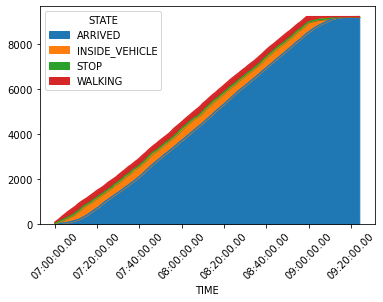

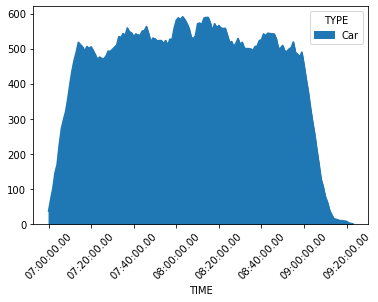

In [554]:
data_output_dynamic("OUTPUTS")

In [676]:
def speed_evolution(dir):
    
    flow = pd.read_csv(dir + '/flow.csv', encoding='latin-1', delimiter = ";")
    flow2 = flow[['TIME', 'SPEED']].groupby('TIME').mean().reset_index()
    speed = flow2.SPEED
    time = [i[:5] for i in flow2.TIME]
    times = [datetime.datetime.strptime(i, '%H:%M').time() for i in time]
    ax = plt.axes()
    # Convert datetime.time objects into datetime.datetime objects by adding a date
    # to the time
    datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in times]
    ax.plot(datetimes, speed, color='seagreen')
    ax.set_title('Speed evolution')
    ax.set_ylabel('Speed (km/h)')
    ax.set_xlabel('Time')
    # Re-format the x-axis
    fmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(fmt)
    plt.savefig(dir + f"/graph/speed_evolution_veh.pdf")
    plt.show()

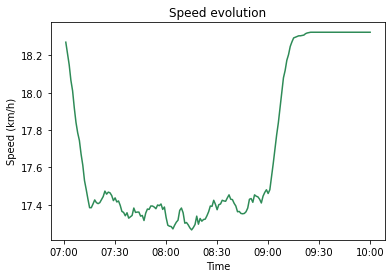

In [677]:
speed_evolution('OUTPUTS')